In [1]:
from shutil import copyfile
from functions.widgets.selection import object_data_selection_widget
from functions.widgets.inversion import pf_inversion_widget

# Lets create a working copy
my_h5file = r"assets/FlinFlon.geoh5"
  
new_file = copyfile(my_h5file, my_h5file[:-6] + "_work.geoh5")

In [2]:
pf_inversion_widget(new_file, resolution=100, inducing_field="58500, 78, 7.5")

In [8]:
x = np.ones(3)



In [9]:
from geoh5io.workspace import Workspace
from discretize.utils import meshutils

In [23]:
w_s = Workspace(new_file)
grav = w_s.get_entity("Predicted")[0] #curve.children[1]
xyz_locs = grav.vertices

# Grid size
core_cell_size = [100, 100, 100]
padding_distance = [[5000, 5000], [8000, 8000], [0,0]]

lim_x = [333000, 360000]
lim_y = [6071000, 6096000]

# ind_sub = (
#         (xyz_locs[:, 0] > lim_x[0]) * 
#         (xyz_locs[:, 0] < lim_x[1]) * 
#         (xyz_locs[:, 1] > lim_y[0]) * 
#         (xyz_locs[:, 1] < lim_y[1])
#     )

# xyz_sub = xyz_locs[ind_sub, :]
# data_sub = grav.values[ind_sub]

mesh = meshutils.mesh_builder_xyz(
            xyz_locs,
            core_cell_size,
            padding_distance=padding_distance,
            depth_core=1000,
            mesh_type='TREE',
)
mesh = meshutils.refine_tree_xyz(
    mesh, xyz_locs, method='surface',
    octree_levels=[1], finalize=True
)


In [22]:
meshutils.mesh_builder_xyz?


In [27]:

from geoh5io.objects import Octree
import numpy as np

w_s = Workspace("Test.geoh5")

indArr, levels = mesh._ubc_indArr
ubc_order = mesh._ubc_order

indArr = indArr[ubc_order]-1
levels = levels[ubc_order]
        
mesh_object = Octree.create(
            w_s,
            name=f"Meshtest",
            origin=mesh.x0 + np.array([0, 0, np.sum(mesh.h[2])]),
            u_count=mesh.h[0].size,
            v_count=mesh.h[1].size,
            w_count=mesh.h[2].size,
            u_cell_size=mesh.h[0][0],
            v_cell_size=mesh.h[1][0],
            w_cell_size=-mesh.h[2][0],
            octree_cells=np.c_[indArr, levels],
            rotation=-30,
        )


In [24]:
mesh.maxLevel




5

In [4]:
# Grid size
core_cell_size = [500, 500]
padding_distance = [[5000, 5000], [8000, 8000]]

lim_x = [333000, 360000]
lim_y = [6071000, 6096000]

ind_sub = (
        (xyz_locs[:, 0] > lim_x[0]) * 
        (xyz_locs[:, 0] < lim_x[1]) * 
        (xyz_locs[:, 1] > lim_y[0]) * 
        (xyz_locs[:, 1] < lim_y[1])
    )

xyz_sub = xyz_locs[ind_sub, :]
data_sub = grav.values[ind_sub]

mesh2D = meshutils.mesh_builder_xyz(
            xyz_sub[:, :2],
            core_cell_size,
            padding_distance=padding_distance,
            mesh_type='TREE',
)
mesh2D = meshutils.refine_tree_xyz(
    mesh2D, xyz_sub[:, :2], method='surface',
    octree_levels=[1], finalize=True
)

In [5]:
# Downsample obs on grid
tree = sp.spatial.cKDTree(xyz_sub[:, :2])
rad, ind_loc = tree.query(mesh2D.gridCC)

ind_loc = np.unique(ind_loc)

xyz = xyz_sub[ind_loc, :]
data = data_sub[ind_loc]



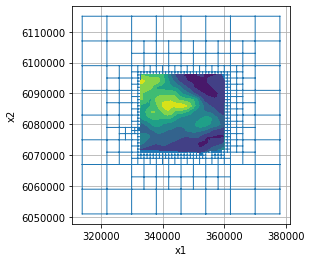

In [6]:
# Triangulate the points for plotting
# surf = sp.spatial.Delaunay(xyz[:, :2])

axs = plt.subplot()
mesh2D.plotGrid(ax=axs)
# axs.scatter(xyz[:, 0], xyz[:, 1], 5, data)
axs.tricontourf(xyz[:, 0], xyz[:, 1], data, zorder=10)
# axs.set_xlim(lim_x)
# axs.set_ylim(lim_y)
axs.set_aspect('equal')

In [7]:
dtm = utils.get_topo([345000, 6085000], 30000, 30000, resolution=200, angle=0, repository=r"C:\Users\dominiquef\Dropbox\MDRU_GBC_GAP\Data\Topography")

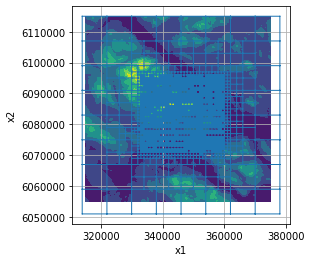

In [8]:
axs = plt.subplot()
mesh2D.plotGrid(ax=axs)
# axs.scatter(xyz[:, 0], xyz[:, 1], 5, data)
axs.tricontourf(dtm[:, 0], dtm[:, 1], dtm[:, 2])
axs.set_aspect('equal')

In [9]:
pf_inversion(r"C:\Users\dominiquef\Desktop\Gravity\PF_inversion_input.json")

# np.savetxt(r"C:\Users\dominiquef\Dropbox\MDRU_CMPA\Modeling\Gravity\dtm.topo", dtm)
# np.savetxt(r"C:\Users\dominiquef\Dropbox\MDRU_CMPA\Modeling\Gravity\grav.dat", np.c_[xyz, data, np.ones_like(data)*100])


Working directory: C:\Users\dominiquef\Desktop\Gravity\
Min uncert: 100 nT
Calculating global active cells from topo
SimPEG.DataMisfit.l2_DataMisfit assigning default eps of 1e-5 * ||dobs||
DASK: Chunking using parameters
Tile size (nD, nC):  (1071, 67015)
Number of chunks: 1 x 5 = 5
Target chunk size: 128 MB
Max chunk size 1071 x 13403 = 114.837 MB
Min chunk size 1071 x 13403 = 114.837 MB
Max RAM (GB x 4 CPU): 0.459348
Tile size (GB): 0.574
Zarr file detected with same shape and chunksize ... re-loading
Use Simple
Start Inversion: voxel
Target Misfit: 5.36e+02 (1071 data with chifact = 1)
SimPEG.SaveModelEveryIteration will save your models in UBC format as: '###-C:\Users\dominiquef\Desktop\Gravity\\SimPEG_PFInversion\grav.mod'
Approximated diag(JtJ) with linear operator
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
---------------------------------------

C:\Users\dominiquef\Documents\GIT\SimPEG\simpeg\SimPEG\Directives.py:920: RuntimeWarning: invalid value encountered in double_scalars
  self.f_change = np.abs(self.f_old - phim_new) / self.f_old


   1  9.38e-01  9.18e-01  3.10e+00  3.83e+00    3.35e-01      0              
Start CG solve
CG solve time: 13.532578229904175
Eps_q: 0.7144943624565013
delta phim: 1.035e+01
   2  1.88e+00  1.56e-01  6.15e-01  1.31e+00    2.37e-01      0   Skip BFGS  
Start CG solve
CG solve time: 13.869930505752563
Eps_q: 0.5954119687137511
delta phim: 8.143e-01
   3  3.75e+00  3.06e-01  2.06e-01  1.08e+00    1.21e-01      0              
Start CG solve
CG solve time: 13.697568893432617
Eps_q: 0.4961766405947926
delta phim: 1.186e-01
   4  7.51e+00  4.60e-01  1.26e-01  1.40e+00    1.12e-01      0              
Start CG solve
CG solve time: 13.76115369796753
Eps_q: 0.41348053382899386
delta phim: 4.098e-01
   5  1.50e+01  6.54e-01  8.86e-02  1.98e+00    1.11e-01      0              
Start CG solve
CG solve time: 13.507664442062378
Eps_q: 0.3445671115241616
delta phim: 1.304e-02
   6  3.00e+01  9.63e-01  5.96e-02  2.75e+00    1.56e-01      0              
Start CG solve
CG solve time: 13.57524824142456

KeyboardInterrupt: 

In [9]:
# Create points for cells that don't have a location
in_cell = mesh2D._get_containing_cell_indexes(xyz[:, :2])
ind_out = np.ones(mesh2D.nC, dtype='bool')
ind_out[in_cell] = 0

pad_locs = mesh2D.gridCC[ind_out, :]

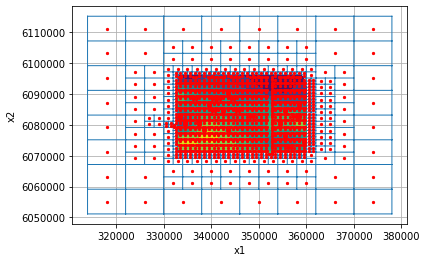

In [14]:
axs = plt.subplot()
mesh2D.plotGrid(ax=axs)
axs.tricontourf(xyz[:, 0], xyz[:, 1], data, zorder=10)
axs.scatter(pad_locs[:, 0], pad_locs[:, 1], 5, 'r', zorder=11)


In [15]:
# Interpolate using scatter min curv



In [ ]:
ind = mesh.get_boundary_cells(actind, direction='zu')[0]

mesh2D = meshutils.mesh_builder_xyz(
                locs[:, :2], core_cell_size[:2],
                padding_distance=padding_distance,
                mesh_type='Tree'
                )

mesh2D.insert_cells(
    mesh.gridCC[ind, :2],
    local_mesh.cell_levels_by_index(ind),
    finalize=False
)